In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data From CSV File

In [15]:
path = "zomato.csv"
dataFrame = pd.read_csv(path)

## Data Exploration and Finding Trends

Graph of number of people who order online on Zomato


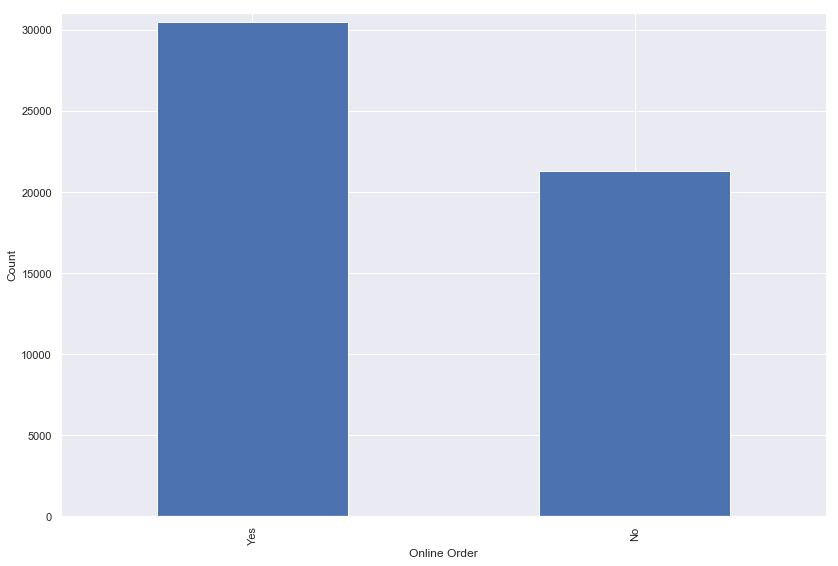

In [16]:
print("Graph of number of people who order online on Zomato")
onlineOrderValueCount = dataFrame['online_order'].value_counts()
sns.set(rc={'figure.figsize':(13.7,9.27)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Count')
plt.xlabel('Online Order')
plt.show()

Graph of number of people who book table on Zomato


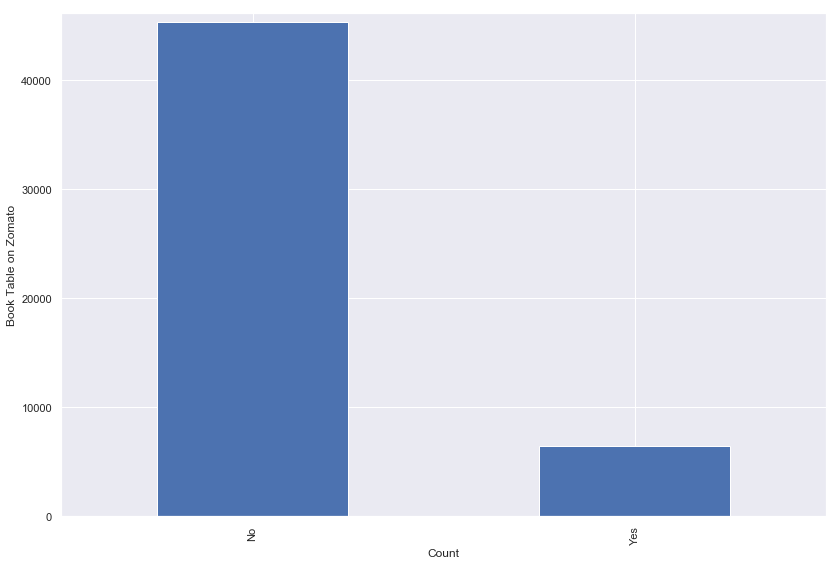

In [18]:
 print("Graph of number of people who book table on Zomato")
onlineOrderValueCount = dataFrame['book_table'].value_counts()
sns.set(rc={'figure.figsize':(13.7,9.27)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Book Table on Zomato')
plt.xlabel('Count')
plt.show()

Graph of ratings of people vs count


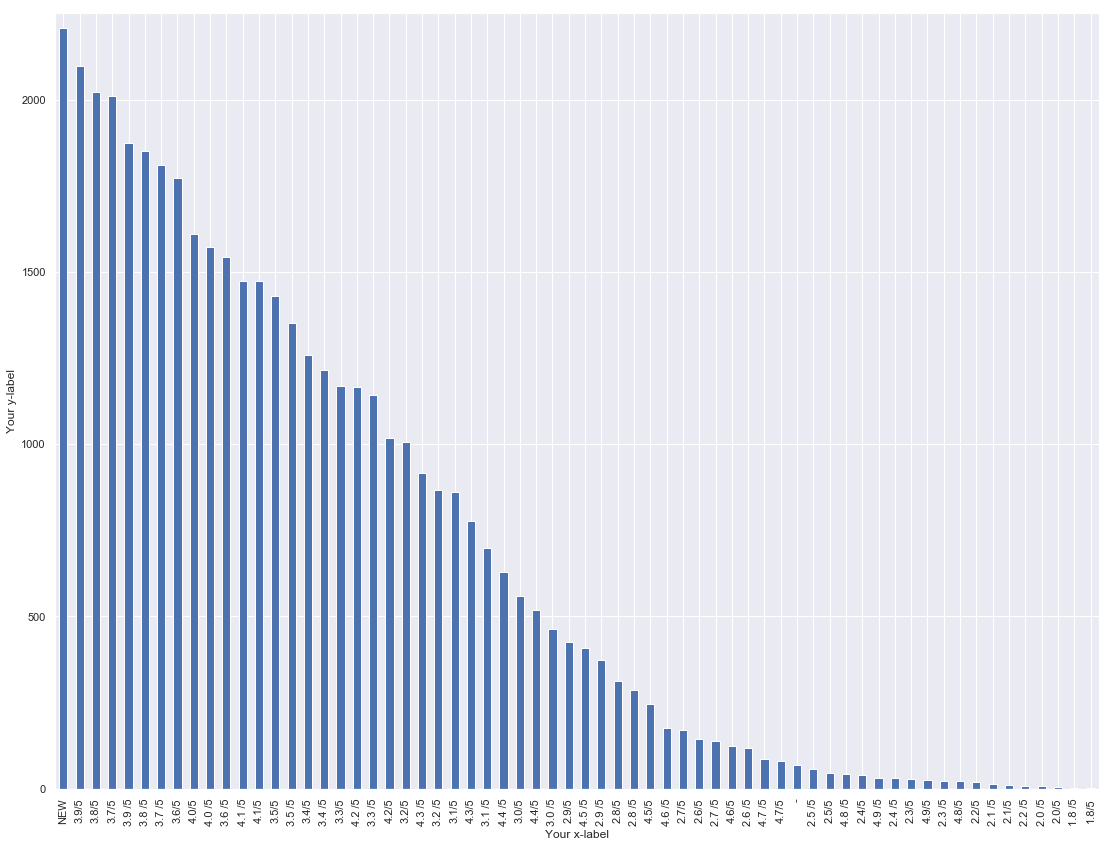

In [19]:
print("Graph of ratings of people vs count")
onlineOrderValueCount = dataFrame['rate'].value_counts()
sns.set(rc={'figure.figsize':(18.7,14.27)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Your y-label')
plt.xlabel('Your x-label')
plt.show()

Graph of number of restaurants in a particular location


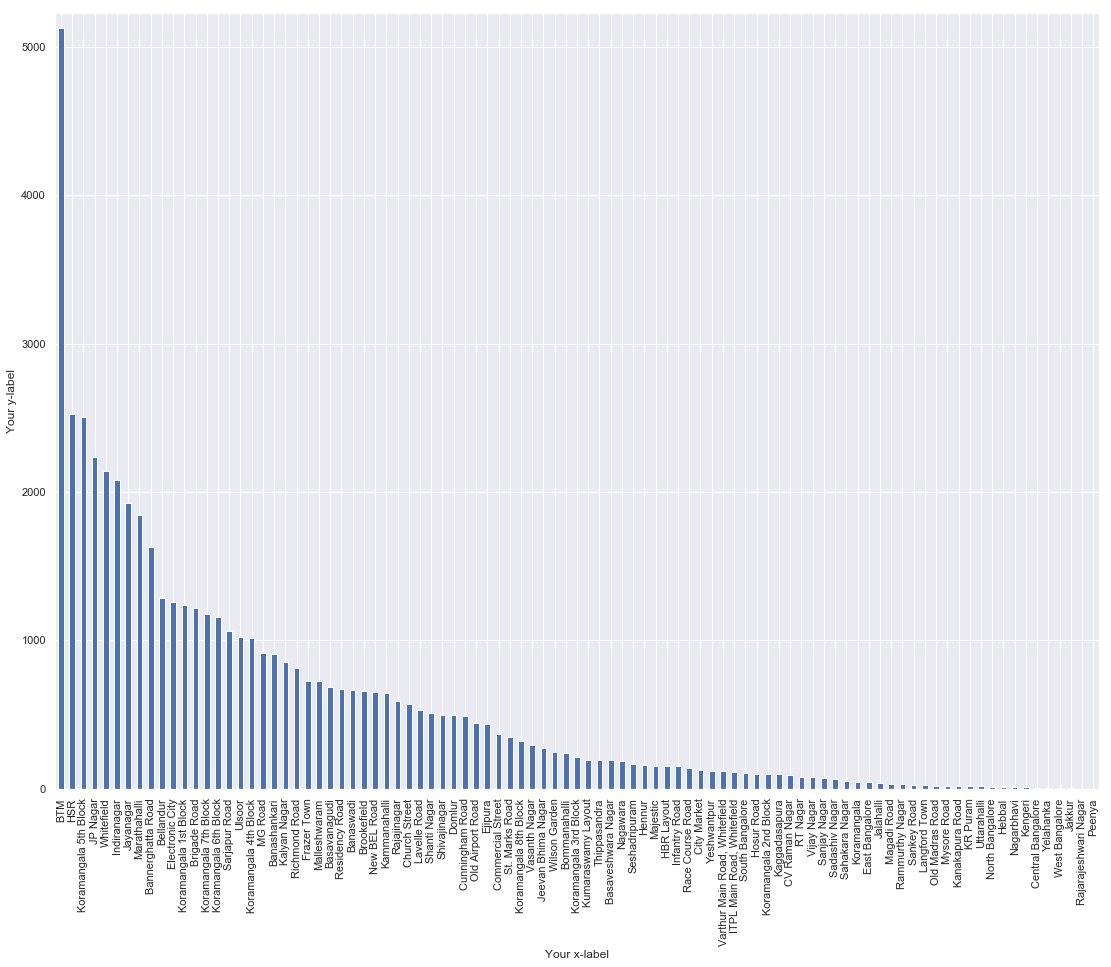

In [20]:
print("Graph of number of restaurants in a particular location")
onlineOrderValueCount = dataFrame['location'].value_counts()
sns.set(rc={'figure.figsize':(18.7,14.27)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Your y-label')
plt.xlabel('Your x-label')
plt.show()

## Cleaning DataSet for blank values

In [ ]:
cleanedDataSet = dataFrame.drop_duplicates(subset=['address','listed_in(type)','listed_in(city)'],keep=False);
cleanedDataSet.dropna(inplace=True)

## Neighbourhood with the highest ratings and its characteristics 

In [22]:
    dataSetWithRatingsAndCities = pd.DataFrame()
    print("Calculating the neightbourhood with the highest rating...")
    dataSetWithRatingsAndCities['location'] = cleanedDataSet['location']
    dataSetWithRatingsAndCities['rest_type'] = cleanedDataSet['rest_type']
    dataSetWithRatingsAndCities['rate'] = cleanedDataSet['rate']
    dataSetWithRatingsAndCities['cuisines'] = cleanedDataSet['cuisines']
    dataSetWithRatingsAndCities['votes'] = cleanedDataSet['votes']
    dataSetWithRatingsAndCities['rest_type'] = cleanedDataSet['rest_type']
        
    mapLocationWithAverageRating = {}
    mapLocationWithCuisines = {}
    mapLocationWithNumberOfVotes = {}
    mapLocationWithRestaurantType = {}
    for index, row in dataSetWithRatingsAndCities.iterrows():
        try:
            ratingValue = float(row['rate'].split('/')[0]) 
            if row['location'] in mapLocationWithAverageRating:
                mapLocationWithAverageRating[row['location']] += ratingValue /2
                mapLocationWithCuisines[row['location']] += row['cuisines']
                mapLocationWithRestaurantType[row['location']] += " , "+row['rest_type']
            else:        
                mapLocationWithAverageRating[row['location']] = ratingValue
                mapLocationWithCuisines[row['location']] = row['cuisines']
                mapLocationWithRestaurantType[row['location']] = row['rest_type']
        except ValueError:
            exception = "exception"
        
avgRatingLIst = []
avgRatingListavgRatingList = sorted(mapLocationWithAverageRating.items(), key=lambda x:x[1], reverse=True)
highestRatingNeighbourhood = avgRatingListavgRatingList[0][0];
print("Highest Rating Neighbourhood is"+ highestRatingNeighbourhood)
print("-----------------------------------------------------------")
print("Cuisines famous in the area are: "+mapLocationWithCuisines[highestRatingNeighbourhood])
print("-----------------------------------------------------------")
print("Type of restaurants famous in the area are: "+ mapLocationWithRestaurantType[highestRatingNeighbourhood])

Calculating the neightbourhood with the highest rating...
Highest Rating Neighbourhood isKoramangala 5th Block
-----------------------------------------------------------
Cuisines famous in the area are: Biryani, Andhra, North Indian, ChineseBeverages, Fast Food, DessertsIce Cream, Bakery, DessertsBeverages, Juices, Fast FoodNorth Indian, European, MediterraneanModern Indian, European, AsianNorth Indian, Chinese, Continental, Thai, SaladContinental, Asian, American, North Indian, DessertsNorth Indian, Mughlai, SaladAsian, Chinese, Thai, MomosChettinad, Andhra, KeralaChinese, Thai, MomosNorth Indian, Mughlai, South Indian, ChineseNorth Indian, South Indian, Chinese, BiryaniNorth Indian, ChineseCafe, American, Burger, SteakCafe, Italian, Fast FoodCafe, Continental, European, JuicesCafe, Italian, DessertsCafe, American, Burger, Sandwich, BeveragesCafe, Continental, Italian, BurgerContinental, Cafe, Italian, Fast Food, SteakIce Cream, Cafe, Pizza, Burger, Desserts, BeveragesCafe, SaladCafe

# Machine Learning 

<b>Question :</b> Explain what is the task youâ€™re solving (e.g., supervised x unsupervised, classification xregression x clustering or similarity matching x etc) ?<br>
<b>A:</b> Since the problem statement involves predicting the price of the 2 people in a particular restaurant, it is a supervised learning where we have a target variable i.e to predict the cost and all other parameters are the input variables. Since its a supervised learning it is a regression problem since we were trying to predict the value of cost. If we were given a value of cost and we had to predict if the predicted cost would be greater or less than any particualar value then it would be a classification problem

<b>Question :</b> What models will you choose? Why? <br>
<b>A:</b> Models used for this purpose would be Decision Tree Regressor, SVM Regressor and Linear Regressor.

In [6]:
machineLearningObj = MachineLearning()
returningValues = machineLearningObj.encodingDataFrame(dataSet)
machineLearningObj.decisionTreeClassifier(returningValues[0],returningValues[1],returningValues[2],returningValues[3])

Encoding Data Frame


C:\Users\navne\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Predicted values according to decision tree classifier
[ 600.          533.33333333  950.         ...  600.         1000.
  600.        ]
